In [2]:
using Pkg
    Pkg.activate(joinpath(Pkg.devdir(), "MLCourse"))

  Activating project at `~/.julia/dev/MLCourse`


In [3]:
using Plots, DataFrames, Random, CSV, MLJ, MLJLinearModels, MLCourse, Statistics, MLJMultivariateStatsInterface, OpenML,LinearAlgebra, Statistics, Random, MLJClusteringInterface, StatsPlots, 
Distributions, Distances, NearestNeighborModels

In [4]:
include("ML_Project/utility.jl")

kaggle_submit (generic function with 1 method)

In [5]:
train_df = DataFrame(CSV.File("./ML_Project/data/train.csv.gz"))
test_df = DataFrame(CSV.File("./ML_Project/data/test.csv.gz"))


"""x = clean_data(vcat(select(train_df, Not(:labels)), test_df))
y = coerce!(train_df, :labels => Multiclass).labels
x_train = x[1:5000,:]
x_test = x[5001:end,:]
0"""

"x = clean_data(vcat(select(train_df, Not(:labels)), test_df))\ny = coerce!(train_df, :labels => Multiclass).labels\nx_train = x[1:5000,:]\nx_test = x[5001:end,:]\n0"

In [8]:
y = coerce!(train_df, :labels => Multiclass).labels
x_train = clean_data(select(train_df, Not(:labels)))
x_test = clean_data(select(test_df, names(x_train)))
x_train = select(train_df, names(x_test))

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2.19038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.86198,0.0,0.506726,0.0,0.0,0.0,0.0,0.0,0.0
3,2.76676,0.0,0.629614,0.0,0.0,0.0,0.0,0.0,0.0
4,2.14643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.84005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.79552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.96702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.02083,0.0,0.374098,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
stds = std.(eachcol(x_train[:,:]))
stds = stds/maximum(stds)

24502-element Vector{Float64}:
 0.3654435655951636
 0.06454466221389774
 0.19554236981137635
 0.01540477331706036
 0.03795143505893736
 0.009849618848089525
 0.006567885021063401
 0.15916570124155385
 0.17434433350085396
 0.2356332238143245
 ⋮
 0.006870193193409656
 0.02920457251875562
 0.1172437316808084
 0.04773781421012049
 0.2321174273743057
 0.05995550314657523
 0.023895413389626037
 0.00686281701580695
 0.43200296517434816

In [52]:
length(stds[stds.>0.5])

105

In [59]:
x_high_std = x_train[:,stds.>0.4]

,A830018L16Rik,Kcnb2,Kcnq5,Khdrbs2,Tmeff2,Plcl1,Erbb4,Vwc2l
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.29369,0.0,1.83934,0.0,1.29369,0.0,4.59421,0.0
2,2.18809,1.29182,1.09177,0.506726,2.65303,0.0,0.0,1.45844
3,1.01297,1.83439,3.1321,1.01297,1.28941,0.0,0.0,0.629614
4,2.34592,2.25114,3.27698,0.664895,1.34361,0.0,0.664895,1.06076
5,1.88794,2.24163,2.31346,2.31346,2.38048,1.33576,1.1321,0.0
6,1.06961,2.66721,2.66721,1.06961,2.52456,0.0,5.02536,0.0
7,0.0,0.0,2.402,1.79552,0.0,0.0,0.0,0.0
8,1.54534,2.38314,2.58766,0.0,0.801939,0.0,2.58766,0.0
9,1.79017,1.79017,1.03486,1.71142,2.7708,1.53243,4.75951,2.47556


In [6]:
#df_no_const = df_data_data[:,  std.(eachcol(df_data_data)) .!= 0]
#df_no_zero = train_df[:,  maximum.(eachcol(train_df)) .!= 0]
0

0

In [14]:
mach = machine(MultinomialClassifier(penalty = :none), select(df_no_zero, Not(:labels)), df_no_zero.labels) |> fit!

┌ Info: Training machine(MultinomialClassifier(lambda = 1.0, …), …).
└ @ MLJBase /Users/guillaumebelissent/.julia/packages/MLJBase/kihuj/src/machines.jl:496
┌ Info: Solver: LBFGS()
└ @ MLJLinearModels /Users/guillaumebelissent/.julia/packages/MLJLinearModels/YvwMg/src/mlj/interface.jl:77


trained Machine; caches model-specific representations of data
  model: MultinomialClassifier(lambda = 1.0, …)
  args: 
    1:	Source @898 ⏎ Table{AbstractVector{Continuous}}
    2:	Source @869 ⏎ AbstractVector{Multiclass{3}}


In [16]:
pred_train = predict_mode(mach, select(df_no_zero, Not(:labels)))

5000-element CategoricalArrays.CategoricalArray{String7,1,UInt32}:
 "CBP"
 "KAT5"
 "eGFP"
 "CBP"
 "eGFP"
 "CBP"
 "KAT5"
 "CBP"
 "eGFP"
 "CBP"
 ⋮
 "eGFP"
 "CBP"
 "CBP"
 "CBP"
 "KAT5"
 "eGFP"
 "CBP"
 "KAT5"
 "eGFP"

In [17]:
mean(pred_train  .== df_no_zero.labels)

1.0

In [ ]:
pred_train2 = predict_mode(mach, df_no_zero[101:end, 1:1000])
mean(pred_train2  .== df_no_zero.labels[101:end])

In [58]:
"""model = MultitargetKNNClassifier(output_type = ColumnTable)
self_tuning_model = TunedModel(model = model, resampling = CV(nfolds = 5), tuning = Grid(),
                    range = range(model, :K, values = 1:50), measure = MisclassificationRate())
KNN_tuned = machine(self_tuning_model, x_train[:,1:30], y)
fit!(KNN_tuned, verbosity = 0)"""

"model = MultitargetKNNClassifier(output_type = ColumnTable)\nself_tuning_model = TunedModel(model = model, resampling = CV(nfolds = 5), tuning = Grid(),\n                    range = range(model, :K, values = 1:50), measure = MisclassificationRate())\nKNN_tuned = machine(self_tuning_model, x_train[:,1:30], y)\nfit!(KNN_tuned, verbosity = 0)"

In [60]:
model = KNNClassifier()
self_tuning_model = TunedModel(model = model, resampling = CV(nfolds = 5), tuning = Grid(goal = 15),
                    range = range(model, :K, values = 1:50), measure = MisclassificationRate())
KNN_tuned = machine(self_tuning_model, x_high_std, y)
fit!(KNN_tuned, verbosity = 0)

trained Machine; does not cache data
  model: ProbabilisticTunedModel(model = KNNClassifier(K = 5, …), …)
  args: 
    1:	Source @573 ⏎ Table{AbstractVector{ScientificTypesBase.Continuous}}
    2:	Source @013 ⏎ AbstractVector{Multiclass{3}}


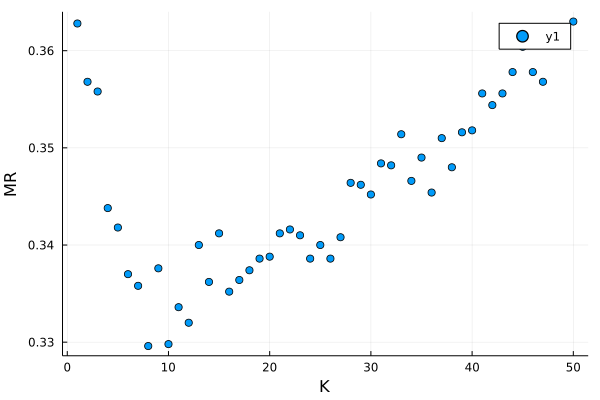

In [75]:
rep = report(KNN_tuned)
scatter(reshape(rep.plotting.parameter_values, :), rep.plotting.measurements, xlabel = "K", ylabel = "MR")


In [65]:
pred = predict_mode(KNN_tuned, x_high_std)
mean(pred  .== y)


0.763

In [66]:
total_data = vcat(x_train, x_test)

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2.19038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.86198,0.0,0.506726,0.0,0.0,0.0,0.0,0.0,0.0
3,2.76676,0.0,0.629614,0.0,0.0,0.0,0.0,0.0,0.0
4,2.14643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.84005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.79552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.96702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.02083,0.0,0.374098,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
mach = fit!(machine(Standardizer(), x_high_std));
data = MLJ.transform(mach, x_high_std)

┌ Info: Training machine(Standardizer(features = Symbol[], …), …).
└ @ MLJBase /Users/guillaumebelissent/.julia/packages/MLJBase/kihuj/src/machines.jl:496


,A830018L16Rik,Kcnb2,Kcnq5,Khdrbs2,Tmeff2,Plcl1,Erbb4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.247368,-1.9106,-0.493955,-1.50878,-0.799365,-0.936065,1.52773
2,0.812725,-0.467844,-1.19394,-0.884679,0.864564,-0.936065,-0.943049
3,-0.580086,0.138127,0.716521,-0.261167,-0.804595,-0.936065,-0.943049
4,0.99979,0.603576,0.852181,-0.689871,-0.738253,-0.936065,-0.585466
5,0.456975,0.592953,-0.0500118,1.34058,0.530948,0.725164,-0.334201
6,-0.512955,1.06826,0.281215,-0.191408,0.707315,-0.936065,1.75961
7,-1.78071,-1.9106,0.0328854,0.702653,-2.38293,-0.936065,-0.943049
8,0.0509084,0.750997,0.206731,-1.50878,-1.4013,-0.936065,0.448604
9,0.341089,0.0887408,-1.24723,0.599067,1.00873,0.96976,1.61663


In [73]:
stds = std.(eachcol(data[:,:]))

320-element Vector{Float64}:
 1.0
 1.0
 0.9999999999999998
 0.9999999999999998
 0.9999999999999998
 0.9999999999999998
 1.0
 0.9999999999999998
 1.0000000000000002
 0.9999999999999997
 ⋮
 0.9999999999999998
 0.9999999999999996
 1.0
 1.0000000000000002
 0.9999999999999998
 0.9999999999999999
 1.0
 1.0000000000000002
 1.0

In [85]:
stds = std.(eachcol(total_data[:,:]))
stds = stds/maximum(stds)
println(length(stds[stds.>0.4]))
x_high_std = x_train[:,stds.>0.4]

333


,Sntg1,A830018L16Rik,Kcnb2,Kcnq5,Khdrbs2,Tmeff2,Plcl1,Erbb4
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.83934,1.29369,0.0,1.83934,0.0,1.29369,0.0,4.59421
2,0.841436,2.18809,1.29182,1.09177,0.506726,2.65303,0.0,0.0
3,2.71006,1.01297,1.83439,3.1321,1.01297,1.28941,0.0,0.0
4,2.25114,2.34592,2.25114,3.27698,0.664895,1.34361,0.0,0.664895
5,1.98876,1.88794,2.24163,2.31346,2.31346,2.38048,1.33576,1.1321
6,3.76383,1.06961,2.66721,2.66721,1.06961,2.52456,0.0,5.02536
7,1.79552,0.0,0.0,2.402,1.79552,0.0,0.0,0.0
8,2.49062,1.54534,2.38314,2.58766,0.0,0.801939,0.0,2.58766
9,2.47556,1.79017,1.79017,1.03486,1.71142,2.7708,1.53243,4.75951


In [86]:
model = KNNClassifier()
self_tuning_model = TunedModel(model = model, resampling = CV(nfolds = 5), tuning = Grid(goal = 15),
                    range = range(model, :K, values = 1:50), measure = MisclassificationRate())
KNN_tuned = machine(self_tuning_model, x_high_std, y)
fit!(KNN_tuned, verbosity = 0)

trained Machine; does not cache data
  model: ProbabilisticTunedModel(model = KNNClassifier(K = 5, …), …)
  args: 
    1:	Source @776 ⏎ Table{AbstractVector{ScientificTypesBase.Continuous}}
    2:	Source @857 ⏎ AbstractVector{Multiclass{3}}


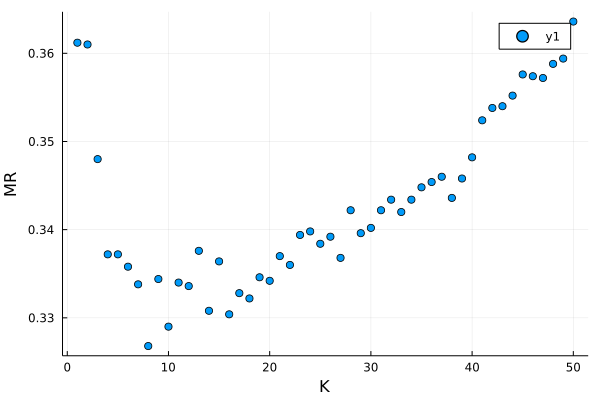

In [87]:
rep = report(KNN_tuned)
scatter(reshape(rep.plotting.parameter_values, :), rep.plotting.measurements, xlabel = "K", ylabel = "MR")

In [88]:
pred = predict_mode(KNN_tuned, x_high_std)
mean(pred  .== y)

0.7632

In [90]:
mach = fit!(machine(Standardizer(), total_data[:,stds.>0.4]));
norm_data = MLJ.transform(mach, total_data[:,stds.>0.4])

┌ Info: Training machine(Standardizer(features = Symbol[], …), …).
└ @ MLJBase /Users/guillaumebelissent/.julia/packages/MLJBase/kihuj/src/machines.jl:496


,Sntg1,A830018L16Rik,Kcnb2,Kcnq5,Khdrbs2,Tmeff2,Plcl1
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.59941,-0.248744,-1.8936,-0.488691,-1.52254,-0.789479,-0.918195
2,-1.94758,0.812311,-0.455852,-1.18917,-0.89885,0.859165,-0.918195
3,0.576926,-0.581763,0.148014,0.722622,-0.275751,-0.794661,-0.918195
4,-0.0430693,0.999546,0.611847,0.858375,-0.704171,-0.728928,-0.918195
5,-0.397543,0.456239,0.601261,-0.0444414,1.32493,0.528613,0.743292
6,2.00057,-0.514571,1.07491,0.287015,-0.206039,0.703361,-0.918195
7,-0.658616,-1.78348,-1.8936,0.0385132,0.687429,-2.35849,-0.918195
8,0.280463,0.0498034,0.758757,0.212479,-1.52254,-1.38588,-0.918195
9,0.260112,0.340247,0.0987996,-1.24249,0.583912,1.002,0.987926


In [96]:
x_norm = norm_data[1:5000,:]
model = KNNClassifier()
norm_tuned_model = TunedModel(model = model, resampling = CV(nfolds = 5), tuning = Grid(goal = 15),
                    range = range(model, :K, values = 1:50), measure = MisclassificationRate())
KNN_tuned_norm = machine(norm_tuned_model, x_norm, y)
fit!(KNN_tuned_norm, verbosity = 0)

trained Machine; does not cache data
  model: ProbabilisticTunedModel(model = KNNClassifier(K = 5, …), …)
  args: 
    1:	Source @436 ⏎ Table{AbstractVector{ScientificTypesBase.Continuous}}
    2:	Source @451 ⏎ AbstractVector{Multiclass{3}}


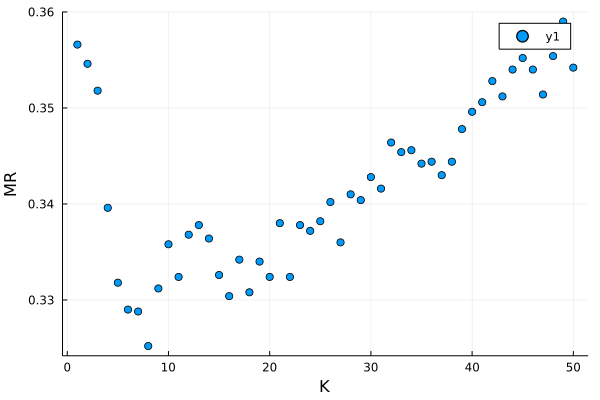

In [98]:
rep = report(KNN_tuned_norm)
scatter(reshape(rep.plotting.parameter_values, :), rep.plotting.measurements, xlabel = "K", ylabel = "MR")

In [100]:
pred = predict_mode(KNN_tuned_norm, x_norm)
mean(pred  .== y)

0.7666